In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from utils import *

RANDOM_STATE = 48

In [22]:
# Load the dataset using pandas
df = pd.read_csv("data.csv")

print(df.head())
df = df.drop('I', axis=1)
df = df.drop('Gravity', axis=1)
# df = df.drop('P_sist', axis=1)
# df = df.drop('P_dist', axis=1)



## Removing our target variable
var = [x for x in df.columns if x not in ['Class']]



print(df.head())



   I     P_sist     P_dist       qPA       Pulse  BreathFreq    Gravity  Class
0  1  13.592433  12.220855  8.416754   75.921057   21.635259  40.000000      2
1  2  15.775386  13.586879  8.725890   63.813564   19.718734  41.530427      2
2  3   3.649369   1.904802  0.000000  197.210213   19.045471  52.730745      3
3  4  17.264362  13.700638  8.733333  143.636181   17.621141  34.679911      2
4  5  12.705183   9.485389  1.747626   82.636672   12.209535  69.375882      3
      P_sist     P_dist       qPA       Pulse  BreathFreq  Class
0  13.592433  12.220855  8.416754   75.921057   21.635259      2
1  15.775386  13.586879  8.725890   63.813564   19.718734      2
2   3.649369   1.904802  0.000000  197.210213   19.045471      3
3  17.264362  13.700638  8.733333  143.636181   17.621141      2
4  12.705183   9.485389  1.747626   82.636672   12.209535      3


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[var], df[['Class']], train_size = 0.6, random_state = RANDOM_STATE)

print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')

train samples: 900
test samples: 600


In [24]:
min_samples_split_list = [2, 5, 10, 15, 20, 25, 30, 50, 100, 150] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 10, 12, 14, 16, 32, 64, None] # None means that there is no depth limit.

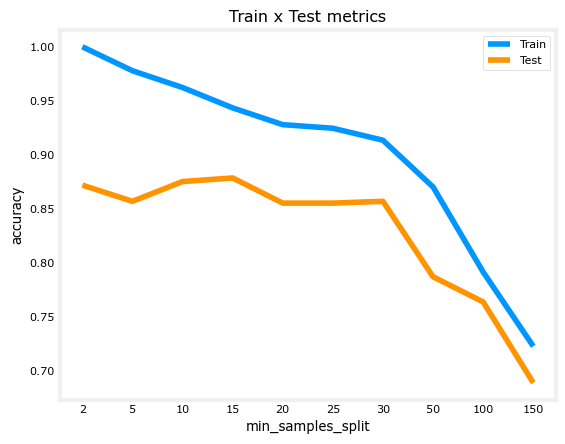

In [25]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

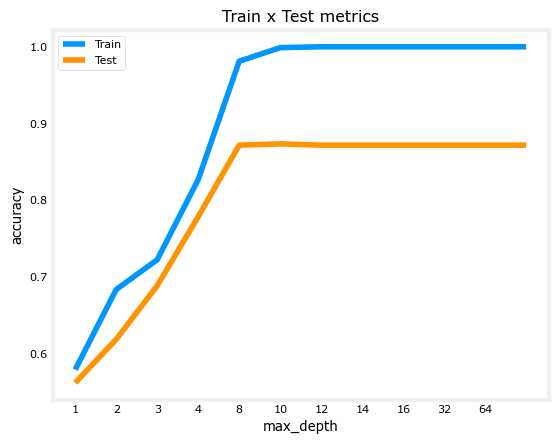

In [26]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

min samples otimos = 15
max depth otima = 8

In [27]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 15,
                                             max_depth = 8,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [28]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9378
Metrics test:
	Accuracy score: 0.8767


using kfold

In [10]:
from sklearn.model_selection import cross_val_score, KFold

# Defina o modelo com os hiperparâmetros ótimos encontrados
decision_tree_model2 = DecisionTreeClassifier(min_samples_split=15, max_depth=8, random_state=RANDOM_STATE)

# KFold para garantir reprodutibilidade e embaralhamento
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# cross_val_score retorna a acurácia em cada fold
scores = cross_val_score(decision_tree_model, df[var], df['Class'], cv=kf, scoring='accuracy')

print(f"Acurácias em cada fold: {scores}")
print(f"Acurácia média (cross-validation): {np.mean(scores):.4f}")

Acurácias em cada fold: [0.86666667 0.87       0.86666667 0.87       0.88666667]
Acurácia média (cross-validation): 0.8720


In [29]:
print(f"Desvio padrão das acurácias: {np.std(scores):.4f}")

Desvio padrão das acurácias: 0.0075


In [30]:
# Treine o modelo com os hiperparâmetros ótimos
decision_tree_model2.fit(X_train, y_train)

# Calcule as acurácias
acc_train = accuracy_score(y_train, decision_tree_model2.predict(X_train))
acc_test = accuracy_score(y_test, decision_tree_model2.predict(X_test))

print(f"Acurácia no treino: {acc_train:.4f}")
print(f"Acurácia no teste: {acc_test:.4f}")

Acurácia no treino: 0.9378
Acurácia no teste: 0.8767


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Previsões
y_pred_train = decision_tree_model2.predict(X_train)
y_pred_test = decision_tree_model2.predict(X_test)

# Acurácia
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Precision, Recall, F1
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Treino:")
print(f"  Acurácia: {acc_train:.4f}")
print(f"  Precision: {precision_train:.4f}")
print(f"  Recall: {recall_train:.4f}")
print(f"  F1-score: {f1_train:.4f}")

print(f"Teste:")
print(f"  Acurácia: {acc_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall: {recall_test:.4f}")
print(f"  F1-score: {f1_test:.4f}")

# Opcional: matriz de confusão
print("Matriz de confusão (teste):")
print(confusion_matrix(y_test, y_pred_test))

Treino:
  Acurácia: 0.9378
  Precision: 0.9390
  Recall: 0.9378
  F1-score: 0.9380
Teste:
  Acurácia: 0.8767
  Precision: 0.8775
  Recall: 0.8767
  F1-score: 0.8769
Matriz de confusão (teste):
[[ 90   5   0   0]
 [  9 306  25   1]
 [  0  25 121   5]
 [  0   0   4   9]]
